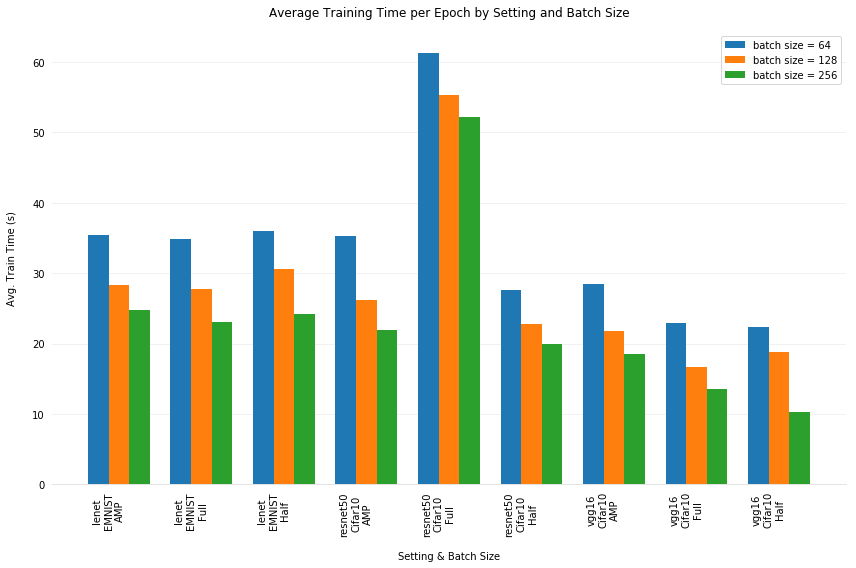

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
%matplotlib inline
# plt.style.use('ggplot')
# sns.set_context('talk')
from matplotlib import colors as mcolors
from pylab import *

files = [
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_AMP',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_Full',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize1024_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize128_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize256_Half',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_AMP',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Full',
#	'output/v100_fullmodel/results_lenet_EMNIST_batchsize512_Half',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_AMP',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Full',
	'output/v100_fullmodel/results_lenet_EMNIST_batchsize64_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize128_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize256_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_AMP',
#	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize512_Half',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_AMP',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Full',
	'output/v100_fullmodel/results_resnet50_Cifar10_batchsize64_Half',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_AMP',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_Full',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize1024_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize128_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize256_Half',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_AMP',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Full',
#	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize512_Half',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_AMP',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Full',
	'output/v100_fullmodel/results_vgg16_Cifar10_batchsize64_Half'
]

data = []
data.append(['model', 'dataset', 'batch_size', 'precision', 'avg_epoch_train_time'])
for file in files:
  tmp = file.replace('output/v100_fullmodel/results_' ,'')
  tmp = tmp.split('_')
  model = tmp[0]
  dataset = tmp[1]
  batch_size = tmp[2].replace('batchsize','')
  precision = tmp[3]
  df=pd.read_csv(file, sep=',',header=0)
  df = df.iloc[1:] # delete the first (re-training) row (epoch 0)
  avg_train_time = df['epoch_train_time'].mean()
  data.append([model, dataset, batch_size, precision, avg_train_time])

df = pd.DataFrame(data[1:],columns=data[0])
df['settng'] = df.model + "\n" + df.dataset + "\n" + df.precision
df = df[['settng', 'batch_size', 'avg_epoch_train_time']]

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df.settng.unique()))
bar_width = 0.25
b1 = ax.bar(x, df.loc[df['batch_size']=='64', 'avg_epoch_train_time'], width=bar_width, label='batch size = 64')
b2 = ax.bar(x + (1*bar_width), df.loc[df['batch_size']=='128', 'avg_epoch_train_time'], width=bar_width, label='batch size = 128')
b3 = ax.bar(x + (2*bar_width), df.loc[df['batch_size']=='256', 'avg_epoch_train_time'], width=bar_width, label='batch size = 256')
#b4 = ax.bar(x + (3*bar_width), df.loc[df['batch_size']=='512', 'avg_epoch_train_time'], width=bar_width, label='batch size = 512')
#b5 = ax.bar(x + (4*bar_width), df.loc[df['batch_size']=='1024', 'avg_epoch_train_time'], width=bar_width, label='batch size = 1024')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df.settng.unique(), rotation=90)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Setting & Batch Size', labelpad=15)
ax.set_ylabel('Avg. Train Time (s)', labelpad=15)
ax.set_title('Average Training Time per Epoch by Setting and Batch Size', pad=15)
fig.tight_layout()
plt.show()

In [3]:
results_df1 = pd.read_csv('output/v100_convergence/results_resnet50_Cifar10_batchsize128_Full.csv')
results_df2 = pd.read_csv('output/v100_convergence/results_resnet50_Cifar10_batchsize128_AMP.csv')

In [4]:
df1 = results_df1[results_df1.test_acc > 0].copy()
df2 = results_df2[results_df2.test_acc > 0].copy()
df1

,Unnamed: 0,epoch,training_loss,test_acc,epoch_train_time,total_train_time,lr
0,0,0,-1.000000,10.52,-1.000000,-1.000000,-1.0
20,20,20,0.355836,84.63,55.632365,1112.631768,0.1
40,40,40,0.107702,88.16,55.648688,2225.589901,0.1
60,60,60,0.143383,89.81,55.650307,3338.332842,0.1
80,80,80,0.067504,89.96,55.634007,4451.057977,0.1
100,100,100,0.002791,92.22,55.644622,5563.945531,0.1
120,120,120,0.000087,92.38,55.615337,6676.194474,0.1
140,140,140,0.000223,92.34,55.612908,7788.440814,0.1


<Figure size 1440x1152 with 0 Axes>

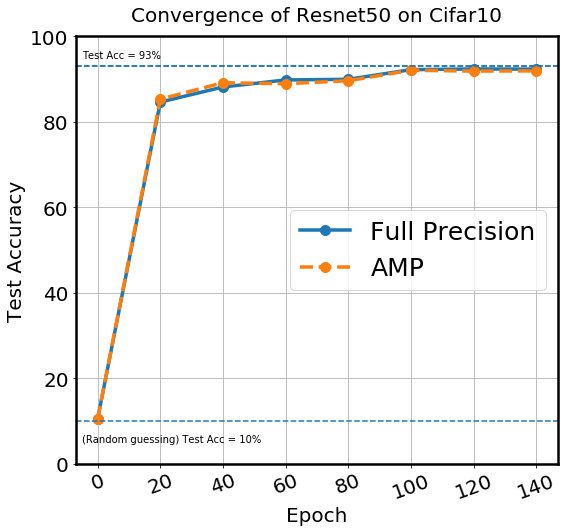

In [15]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)

# tar acc
df1.plot(x='epoch', y='test_acc', linestyle='-', marker=".",
          ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
          label=r"Full Precision").axhline(y=93, linestyle="--")

df2.plot(x='epoch', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
          label=r"AMP").axhline(y=93, linestyle="--")

plt.axhline(y=10, linestyle="--")

ax.annotate('Test Acc = 93%', 
            xy=(0, 93), 
            xytext=(-5, 95), 
            )

ax.annotate('(Random guessing) Test Acc = 10%', 
            xy=(0, 10), 
            xytext=(-5, 5), 
            )


plt.xlabel("Epoch", size=20)
plt.ylabel("Test Accuracy", size=20)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(0, 100)
# plt.xlim(-1, 150)
legend_properties = {'size':25}
ax.xaxis.get_offset_text()
ax.xaxis.get_offset_text()
ax.legend(prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
ax.set_title('Convergence of Resnet50 on Cifar10', pad=15, size=20)
plt.grid()
plt.tight_layout()
# plt.savefig("resnet50_convergence_epochs.png", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)

In [ ]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)

# tar acc
df1.plot(x='total_train_time', y='test_acc', linestyle='-', marker=".",
          ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
          label=r"Full Precision").axhline(y=93, linestyle="--")

df2.plot(x='total_train_time', y='test_acc', linestyle='--', marker=".",
          ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
          label=r"AMP").axhline(y=93, linestyle="--")

plt.axhline(y=10, linestyle="--")

ax.annotate('Test Acc = 93%', 
            xy=(0, 93), 
            xytext=(-5, 95), 
            )

ax.annotate('(Random guessing) Test Acc = 10%', 
            xy=(0, 10), 
            xytext=(-5, 5), 
            )


plt.xlabel("Training time (s)", size=20)
plt.ylabel("Test Accuracy", size=20)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(0, 100)
# plt.xlim(-1, 150)
legend_properties = {'size':25}
ax.xaxis.get_offset_text()
ax.xaxis.get_offset_text()
ax.legend(prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
ax.set_title('Convergence of Resnet50 on Cifar10', pad=15, size=20)
plt.grid()
plt.tight_layout()
plt.savefig("resnet50_convergence_time.png", format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)